# 波段差值

## 案例1

In [ ]:
import os 
import numpy as np
from osgeo import gdal
os.chdir(r'D:\Projects\VsCode\Python\img_processing_system\change_detection\imgs\difference')
t_1 = gdal.Open('2015_t1_clip.tif') # t_1和t_2的分辨率大小有一点点不一样
t_2 = gdal.Open('2018_t2_clip_register.tif')

t_1_band = t_1.GetRasterBand(1) # 两张图片都只有一个波段
t_2_band = t_2.GetRasterBand(1)


gtiff_driver = gdal.GetDriverByName('GTiff') 
out_ds = gtiff_driver.Create('difference_between_t1_t2.tif', t_2_band.XSize, t_2_band.YSize)
out_ds.SetProjection(t_1.GetProjection()) 
out_ds.SetGeoTransform(t_1.GetGeoTransform())

t_1_data = t_1_band.ReadAsArray(buf_xsize=t_2_band.XSize, buf_ysize=t_2_band.YSize)
t_2_data = t_2_band.ReadAsArray(buf_xsize=t_2_band.XSize, buf_ysize=t_2_band.YSize)

out_band = out_ds.GetRasterBand(1) 
out_band.WriteArray(np.abs(t_2_data.astype(np.int16) - t_1_data.astype(np.int16)))

out_band.FlushCache() 
out_band.ComputeStatistics(False) 
out_ds.BuildOverviews('average', [2, 4, 8, 16, 32, 64])
del out_ds

In [7]:
# t_2_data - t_1_data的结果是uint8，即不存在负数。
import numpy as np
print(t_2_data.dtype)
res = t_2_data.astype(np.int16) - t_1_data.astype(np.int16)
threshold = 80  # 手工调试得到的阈值
change_mask = np.abs(res) >= threshold


uint8


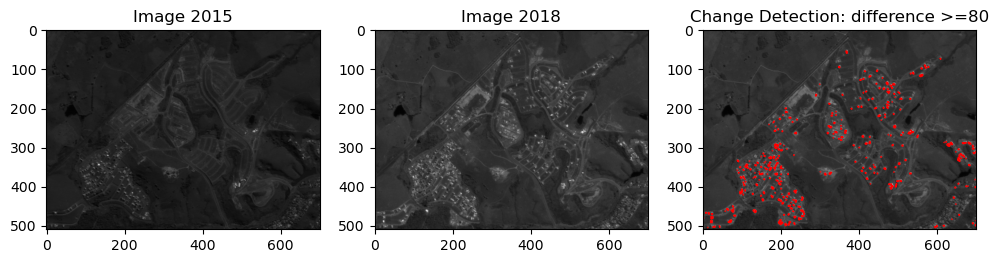

In [8]:
import matplotlib.pyplot as plt

# 创建一个新的图像
plt.figure(figsize=(12, 6))

# 绘制第一幅图像
plt.subplot(1, 3, 1)
plt.imshow(t_1_data, cmap='gray')
plt.title("Image 2015")

# 绘制第二幅图像
plt.subplot(1, 3, 2)
plt.imshow(t_2_data, cmap='gray')
plt.title("Image 2018")

# 绘制第二幅图像
plt.subplot(1, 3, 3)
plt.imshow(t_2_data, cmap='gray')

# 绘制变化区域
plt.contour(change_mask, colors='r', linewidths=1)
plt.title("Change Detection: difference >=" + str(threshold))

# 显示图像
plt.show()

## 案例2
研究的问题：研究森林的变化  
问题：研究森林一般不是用RGB
注：RGB图像最适合研究Artificial surfaces（人工地表）的变化

In [ ]:
import os
from osgeo import gdal
os.chdir(r'D:\Projects\VsCode\Python\img_processing_system\change_detection\imgs\difference')
t_2006 = gdal.Open(r'14-2005-0435-6910-LA93.tif') # 
t_2012 = gdal.Open(r'14-2012-0435-6910-LA93-0M50-E080.tif')


t_2006_band = t_2006.GetRasterBand(2) # 绿光波段
t_2012_band = t_2012.GetRasterBand(2)


gtiff_driver = gdal.GetDriverByName('GTiff') 
out_ds = gtiff_driver.Create('difference_between_2006_2012.tif', t_2012_band.XSize, t_2012_band.YSize)
out_ds.SetProjection(t_2012.GetProjection()) 
out_ds.SetGeoTransform(t_2012.GetGeoTransform())

t_2006_data = t_2006_band.ReadAsArray(buf_xsize=t_2012_band.XSize, buf_ysize=t_2012_band.YSize)
t_2012_data = t_2012_band.ReadAsArray(buf_xsize=t_2012_band.XSize, buf_ysize=t_2012_band.YSize)

out_band = out_ds.GetRasterBand(1) 
out_band.WriteArray(np.abs(t_2012_data.astype(np.int16) - t_2006_data.astype(np.int16))) # 注意：有负数，但是是无符号类型

out_band.FlushCache() 
out_band.ComputeStatistics(False) 
out_ds.BuildOverviews('average', [2, 4, 8, 16, 32, 64])
del out_ds, t_2006,t_2012

# 光谱指数差值
以NDVI为例，影像数据来源：https://earthexplorer.usgs.gov/  
原始ndvi值放大了10000倍。

In [11]:
import os 
import numpy as np
from osgeo import gdal
os.chdir(r'D:\Projects\VsCode\Python\img_processing_system\change_detection\imgs\difference')
ndvi_2025_ds= gdal.Open('ndvi_US_eVSH_NDVI.2025.238-244.HKM.VI_NDVI.001.2025247150649.tif') 
ndvi_2015_ds= gdal.Open('ndvi_US_eVSH_NDVI.2015.349-355.HKM.VI_NDVI.006.2022123165743.tif') 

ndvi_2025_band = ndvi_2025_ds.GetRasterBand(1)
ndvi_2015_band = ndvi_2015_ds.GetRasterBand(1)

ndvi_2025_band_data = ndvi_2025_band.ReadAsArray() 
ndvi_2015_band_data = ndvi_2015_band.ReadAsArray()

gtiff_driver = gdal.GetDriverByName('GTiff') 
out_ds = gtiff_driver.Create('ndvi_difference_between_2025_2010.tif', ndvi_2025_band.XSize, ndvi_2025_band.YSize)
out_ds.SetProjection(ndvi_2025_ds.GetProjection()) 
out_ds.SetGeoTransform(ndvi_2025_ds.GetGeoTransform())

out_band = out_ds.GetRasterBand(1) 
out_band.WriteArray(np.abs(ndvi_2025_band_data - ndvi_2015_band_data))

out_band.FlushCache() 
out_band.ComputeStatistics(False) 
out_ds.BuildOverviews('average', [2, 4, 8, 16, 32, 64])
del out_ds

In [16]:
import numpy as np
print(ndvi_2025_band_data.dtype)
print(np.unique(ndvi_2025_band_data))
res = ndvi_2025_band_data - ndvi_2015_band_data
threshold = 9000
change_mask = np.abs(res) >= threshold

int16
[-2000 -1999 -1998 ...  9996  9997 10000]


## 阈值确定
目的：区分变化区域与未变化区域

总体思路：在差值图像上选定一个包含变化像素的训练区域, 找到一个阈值, 使得变化检测精度最高。把该阈值应用到整幅图像上,
也可以使得变化检测精度达到最大。

具体实现：计算差值图中某个区域所有像素点的绝对值，这些值作为阈值，然后从小到大排列，逐个取值，然后计算每个阈值的变化检测精度。最后，取变化检测精度最好的阈值作为整幅图像的阈值。

训练区域如何选择？

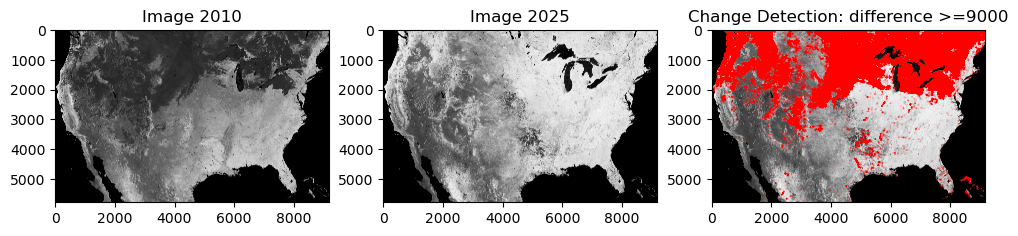

In [17]:
import matplotlib.pyplot as plt

# 创建一个新的图像
plt.figure(figsize=(12, 6))

# 绘制第一幅图像
plt.subplot(1, 3, 1)
plt.imshow(ndvi_2015_band_data, cmap='gray')
plt.title("Image 2010")

# 绘制第二幅图像
plt.subplot(1, 3, 2)
plt.imshow(ndvi_2025_band_data, cmap='gray')
plt.title("Image 2025")

# 绘制第二幅图像
plt.subplot(1, 3, 3)
plt.imshow(ndvi_2025_band_data, cmap='gray')

# 绘制变化区域
plt.contour(change_mask, colors='r', linewidths=1)
plt.title("Change Detection: difference >=" + str(threshold))

# 显示图像
plt.show()